In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

In [2]:
import AR
import Stats
import SIS

In [3]:
# Generating AR process
N = 100
Q = 0.1
R = 1.0
a_true, a_clean = AR.process(N, Q)
S, ex = AR.AR_observation(a_true, R, N)

Text(0.5, 1, 'Time Varying AR Process')

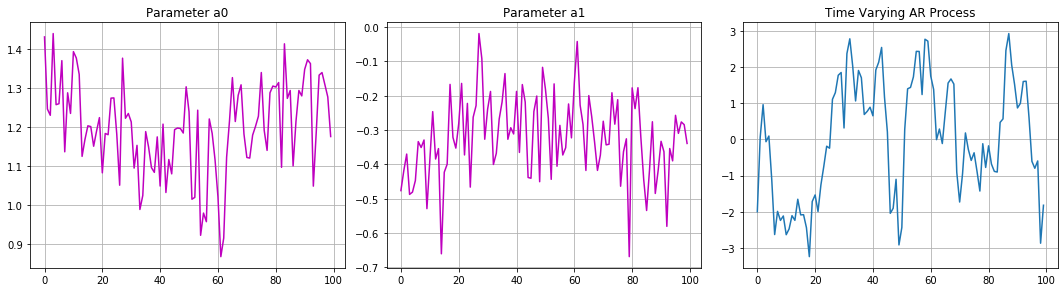

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
plt.tight_layout()

ax[0].plot(range(N), a_true[:,0], color='m')
ax[0].grid(True)
ax[0].set_title("Parameter a0")

ax[1].plot(range(N), a_true[:,1], color='m')
ax[1].grid(True)
ax[1].set_title("Parameter a1")

ax[2].plot(range(N), S)
ax[2].grid(True)
ax[2].set_title("Time Varying AR Process")

#plt.savefig("AR.png")

In [5]:
# illustrative example of SIS
L = 100
Q = 0.1
R = 1.0
a, w = SIS.SIS(N, L, S, Q, R)

In [6]:
# compute point estimate and variance
a_av, a_var = SIS.estimate(N, a, w, L)

In [7]:
# show estimated sample size
ess = np.zeros(N)
for n in range(N):
    ess[n] = Stats.neff(w[n])

Text(0.5, 1, 'Effective Sample Size')

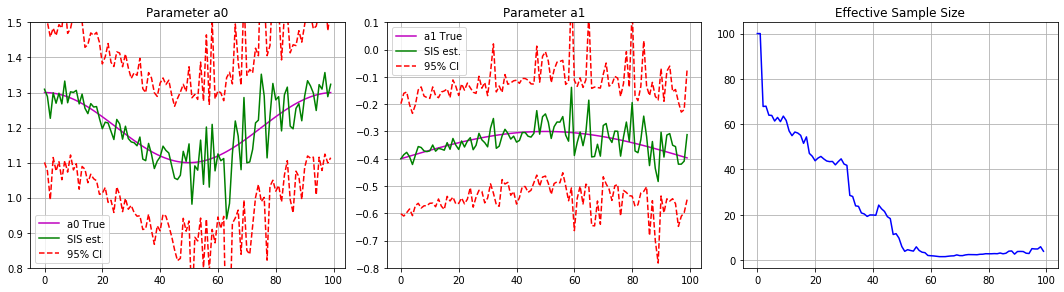

In [8]:
# plot estimate and 95% CI
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
plt.tight_layout()

ax[0].set_ylim(0.8,1.5)
ax[0].plot(range(N), a_clean[:,0], color='m', label="a0 True")
ax[0].plot(range(N), a_av[:,0], color='green', label="SIS est.")
ax[0].plot(range(N), a_av[:,0]+ 2*np.sqrt(a_var[:,0]), "--", color="r", label="95% CI")
ax[0].plot(range(N), a_av[:,0]- 2*np.sqrt(a_var[:,0]), "--", color="r")
ax[0].legend()
ax[0].grid(True)
ax[0].set_title("Parameter a0")

ax[1].set_ylim(-0.8,0.1)
ax[1].plot(range(N), a_clean[:,1], color='m', label="a1 True")
ax[1].plot(range(N), a_av[:,1], color='green', label="SIS est.")
ax[1].plot(range(N), a_av[:,1]+ 2*np.sqrt(a_var[:,1]), "--", color="r", label="95% CI")
ax[1].plot(range(N), a_av[:,1]- 2*np.sqrt(a_var[:,1]), "--", color="r")
ax[1].legend()
ax[1].grid(True)
ax[1].set_title("Parameter a1")

ax[2].plot(range(N), ess, color='b')
ax[2].grid(True)
ax[2].set_title("Effective Sample Size")

#plt.savefig("SIS.png")

In [9]:
Stats.rmse(True, 1, N, L, Q, R)

([0.06623874223062826, 0.0], [0.07720656899722213, 0.0])

In [10]:
# illustrative example of SIR
L = 100
Q = 0.1
R = 1.0
a, w = SIS.SIR(N, L, S, Q, R)

In [11]:
# compute point estimate and variance
a_av, a_var = SIS.estimate(N, a, w, L)

In [12]:
# show estimated sample size
ess = np.zeros(N)
for n in range(N):
    ess[n] = Stats.neff(w[n])

Text(0.5, 1, 'Effective Sample Size')

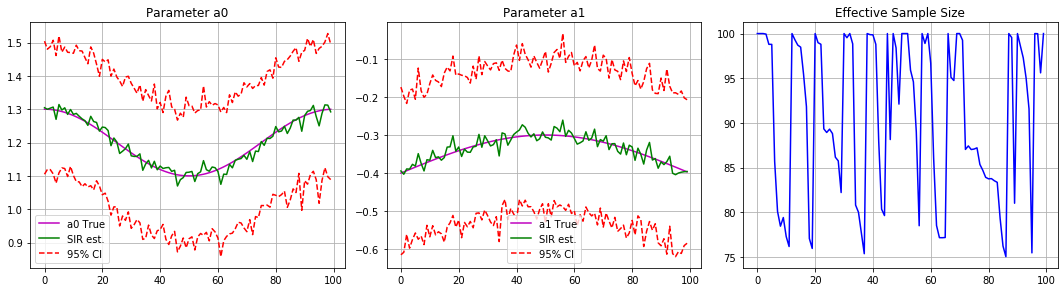

In [13]:
# plot estimate and 95% CI
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
plt.tight_layout()

ax[0].plot(range(N), a_clean[:,0], color='m', label="a0 True")
ax[0].plot(range(N), a_av[:,0], color='green', label="SIR est.")
ax[0].plot(range(N), a_av[:,0]+ 2*np.sqrt(a_var[:,0]), "--", color="r", label="95% CI")
ax[0].plot(range(N), a_av[:,0]- 2*np.sqrt(a_var[:,0]), "--", color="r")
ax[0].legend()
ax[0].grid(True)
ax[0].set_title("Parameter a0")

ax[1].plot(range(N), a_clean[:,1], color='m', label="a1 True")
ax[1].plot(range(N), a_av[:,1], color='green', label="SIR est.")
ax[1].plot(range(N), a_av[:,1]+ 2*np.sqrt(a_var[:,1]), "--", color="r", label="95% CI")
ax[1].plot(range(N), a_av[:,1]- 2*np.sqrt(a_var[:,1]), "--", color="r")
ax[1].legend()
ax[1].grid(True)
ax[1].set_title("Parameter a1")

ax[2].plot(range(N), ess, color='b')
ax[2].grid(True)
ax[2].set_title("Effective Sample Size")

#plt.savefig("SIR.png")

In [14]:
Stats.rmse(False, 1, N, L, Q, R)

([0.015538516076211005, 0.0], [0.01642731989402663, 0.0])

In [15]:
# compute average rmse over T trials for different number of particles (SIS)
rmse0_SIS = np.zeros((5,2))
rmse1_SIS = np.zeros((5,2))
L_vary = np.array([100, 300, 500, 700, 900])
T = 30
N = 100
for n in range(5):
    rmse0_SIS[n], rmse1_SIS[n] = Stats.rmse(True, T, N, L_vary[n], Q, R)

In [16]:
# compute average rmse over T trials for different number of particles (SIR)
rmse0_SIR = np.zeros((5,2))
rmse1_SIR = np.zeros((5,2))
for n in range(5):
    rmse0_SIR[n], rmse1_SIR[n] = Stats.rmse(False, T, N, L_vary[n], Q, R)

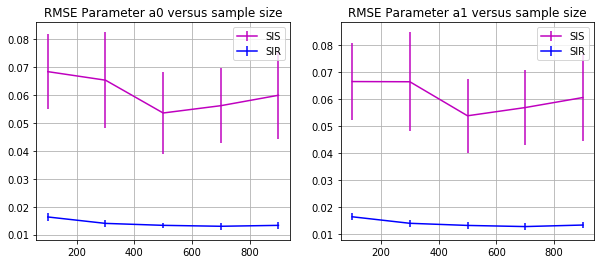

In [19]:
# plot L vs average rmse
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].errorbar(L_vary, rmse0_SIS[:,0], yerr=rmse0_SIS[:,1], color='m', label="SIS")
ax[0].errorbar(L_vary, rmse0_SIR[:,0], yerr=rmse0_SIR[:,1], color='b', label="SIR")
ax[0].legend()
ax[0].grid(True)
ax[0].set_title("RMSE Parameter a0 versus sample size")

ax[1].errorbar(L_vary, rmse1_SIS[:,0], yerr=rmse1_SIS[:,1], color='m', label="SIS")
ax[1].errorbar(L_vary, rmse1_SIR[:,0], yerr=rmse1_SIR[:,1], color='b', label="SIR")
ax[1].legend()
ax[1].grid(True)
ax[1].set_title("RMSE Parameter a1 versus sample size")

#plt.savefig("RMSE.png")